# Optuna SVM

https://github.com/optuna/optuna  
https://qiita.com/koshian2/items/1c0f781d244a6046b83e

In [1]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import optuna
import numpy as np

In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
X, y = boston["data"], boston["target"]
# 訓練、テスト分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=114514)
n_train = int(X_train.shape[0] * 0.75)
X_train, X_val = X_train[:n_train], X_train[n_train:]
y_train, y_val = y_train[:n_train], y_train[n_train:]

In [4]:
# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [5]:
# 目的関数
def objective(trial):
    # C
    svr_c = trial.suggest_loguniform('svr_c', 1e0, 1e2) # かなり広く設定
    # epsilon
    epsilon = trial.suggest_loguniform('epsilon', 1e-1, 1e1) # かなり広く設定
    # SVR
    svr = SVR(C=svr_c, epsilon=epsilon)
    svr.fit(X_train, y_train)
    # 予測
    y_pred = svr.predict(X_val)
    # CrossvalidationのMSEで比較（最大化がまだサポートされていない）
    return mean_squared_error(y_val, y_pred)

In [6]:
%%time
# optuna
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2020-10-08 13:32:02,560] A new study created in memory with name: no-name-0125961f-1bc5-4621-9bdd-5100b90370c0
[I 2020-10-08 13:32:02,581] Trial 0 finished with value: 8.694245056388475 and parameters: {'svr_c': 6.383109471687162, 'epsilon': 0.3338288708158184}. Best is trial 0 with value: 8.694245056388475.
[I 2020-10-08 13:32:02,594] Trial 1 finished with value: 8.41394468782849 and parameters: {'svr_c': 6.656722716273799, 'epsilon': 1.0276461521090985}. Best is trial 1 with value: 8.41394468782849.
[I 2020-10-08 13:32:02,607] Trial 2 finished with value: 9.094268296313457 and parameters: {'svr_c': 5.0764927833849764, 'epsilon': 0.80096914804629}. Best is trial 1 with value: 8.41394468782849.
[I 2020-10-08 13:32:02,625] Trial 3 finished with value: 7.988638418063714 and parameters: {'svr_c': 21.291442351047795, 'epsilon': 0.39880655761409634}. Best is trial 3 with value: 7.988638418063714.
[I 2020-10-08 13:32:02,637] Trial 4 finished with value: 12.472398958309006 and parameters: 

[I 2020-10-08 13:32:03,526] Trial 40 finished with value: 8.566518406583253 and parameters: {'svr_c': 7.846243723453446, 'epsilon': 1.6639611649158974}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:03,554] Trial 41 finished with value: 7.592772416259182 and parameters: {'svr_c': 16.00115166955802, 'epsilon': 1.1948935849617468}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:03,587] Trial 42 finished with value: 7.780056584450382 and parameters: {'svr_c': 10.380913669184999, 'epsilon': 1.2033382019939256}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:03,614] Trial 43 finished with value: 8.130892209489105 and parameters: {'svr_c': 15.63508202099548, 'epsilon': 2.262303673664201}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:03,641] Trial 44 finished with value: 8.12651079132929 and parameters: {'svr_c': 27.954544404280426, 'epsilon': 0.4169678268765471}. Best is trial 31 with value: 7.457348295537

[I 2020-10-08 13:32:04,551] Trial 80 finished with value: 8.528210469251027 and parameters: {'svr_c': 27.871368240043047, 'epsilon': 2.3823273123454087}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:04,574] Trial 81 finished with value: 7.528883619388521 and parameters: {'svr_c': 19.16292978629911, 'epsilon': 1.3598461580976637}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:04,597] Trial 82 finished with value: 15.749769729763672 and parameters: {'svr_c': 1.0316578754936778, 'epsilon': 1.4181648298455098}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:04,623] Trial 83 finished with value: 7.818017765986783 and parameters: {'svr_c': 12.124043631225293, 'epsilon': 1.6088262609104482}. Best is trial 31 with value: 7.457348295537219.
[I 2020-10-08 13:32:04,649] Trial 84 finished with value: 7.96313570736284 and parameters: {'svr_c': 19.789301232867224, 'epsilon': 1.9583172760036467}. Best is trial 31 with value: 7.45734829

Wall time: 2.5 s


In [7]:
# 最適解
print(study.best_params)

{'svr_c': 16.642639524193154, 'epsilon': 1.431920235929426}


In [8]:
print(study.best_value)

7.457348295537219


In [9]:
print(study.best_trial)

FrozenTrial(number=31, value=7.457348295537219, datetime_start=datetime.datetime(2020, 10, 8, 13, 32, 3, 260639), datetime_complete=datetime.datetime(2020, 10, 8, 13, 32, 3, 280638), params={'svr_c': 16.642639524193154, 'epsilon': 1.431920235929426}, distributions={'svr_c': LogUniformDistribution(high=100.0, low=1.0), 'epsilon': LogUniformDistribution(high=10.0, low=0.1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=31, state=TrialState.COMPLETE)


In [10]:
# history
hist_df = study.trials_dataframe()
hist_df.to_csv("boston_svr.csv")

## 評価

In [11]:
# SVR
svr = SVR(C=15.789688964388603, epsilon=1.5174494148654494) # Optuna の最適値
svr.fit(X_train, y_train)
y_pred_val = svr.predict(X_val)
y_pred_test = svr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)
print("交差検証データ　R2 : ", val_r2)
print("テストデータ　R2 : ", test_r2)

交差検証データ　R2 :  0.8692108501883891
テストデータ　R2 :  0.909500392179324


## 試行履歴を見てみる

In [13]:
import pandas as pd
hst = pd.read_csv("boston_svr.csv")
hst

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_epsilon,params_svr_c,state
0,0,0,8.694245,2020-10-08 13:32:02.567638,2020-10-08 13:32:02.580638,0 days 00:00:00.013000,0.333829,6.383109,COMPLETE
1,1,1,8.413945,2020-10-08 13:32:02.584638,2020-10-08 13:32:02.594641,0 days 00:00:00.010003,1.027646,6.656723,COMPLETE
2,2,2,9.094268,2020-10-08 13:32:02.597637,2020-10-08 13:32:02.606641,0 days 00:00:00.009004,0.800969,5.076493,COMPLETE
3,3,3,7.988638,2020-10-08 13:32:02.611639,2020-10-08 13:32:02.624638,0 days 00:00:00.012999,0.398807,21.291442,COMPLETE
4,4,4,12.472399,2020-10-08 13:32:02.628638,2020-10-08 13:32:02.636646,0 days 00:00:00.008008,4.340100,74.065704,COMPLETE
...,...,...,...,...,...,...,...,...,...
95,95,95,7.780226,2020-10-08 13:32:04.924638,2020-10-08 13:32:04.947634,0 days 00:00:00.022996,1.371561,11.017667,COMPLETE
96,96,96,7.674892,2020-10-08 13:32:04.951641,2020-10-08 13:32:04.977635,0 days 00:00:00.025994,1.010855,22.534207,COMPLETE
97,97,97,7.986767,2020-10-08 13:32:04.980639,2020-10-08 13:32:05.002635,0 days 00:00:00.021996,1.537793,31.726852,COMPLETE
98,98,98,7.852998,2020-10-08 13:32:05.005636,2020-10-08 13:32:05.029633,0 days 00:00:00.023997,1.894493,13.950710,COMPLETE


No handles with labels found to put in legend.


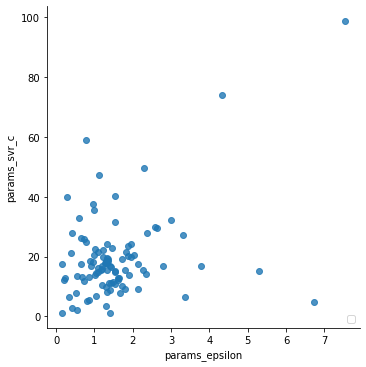

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="params_epsilon", y="params_svr_c", data=hst, fit_reg=False, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')